<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/ADS1_Unit06_Tutorial_6_Fitting_Hands_On_Exercises_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting in Data Science — Tutorial 6
This notebook includes:
- Linear regression
- Non-linear (exponential) fitting
- Polynomial fitting (NumPy, SciPy, scikit-learn variants)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def r2_score_manual(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

print("Libraries ready.")

Libraries ready.


## 1) Linear Regression

Line: y = -25.000 x + 116.667
R^2: 0.9868


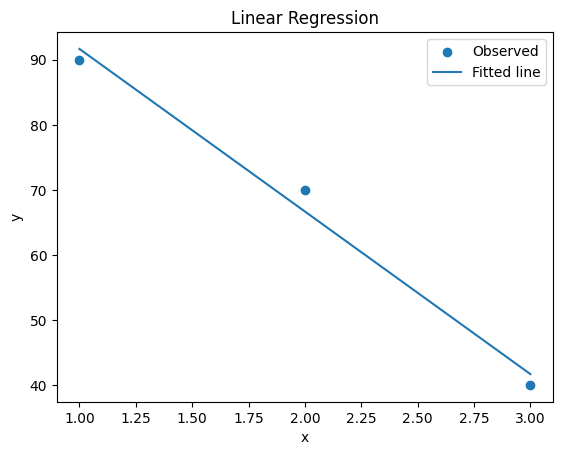

Residuals: [-1.66666667  3.33333333 -1.66666667]


In [2]:
x = np.array([1, 2, 3], dtype=float)
y = np.array([90, 70, 40], dtype=float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_pred = slope * x + intercept
print(f"Line: y = {slope:.3f} x + {intercept:.3f}")
print(f"R^2: {r_value**2:.4f}")
plt.figure(); plt.scatter(x, y, label="Observed"); plt.plot(x, y_pred, label="Fitted line")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Linear Regression"); plt.legend(); plt.show()
print("Residuals:", y - y_pred)

## 2) Non-linear (Exponential) Fitting

Fitted: y = 2.076 * exp(0.490 * x)
R^2: 0.9975


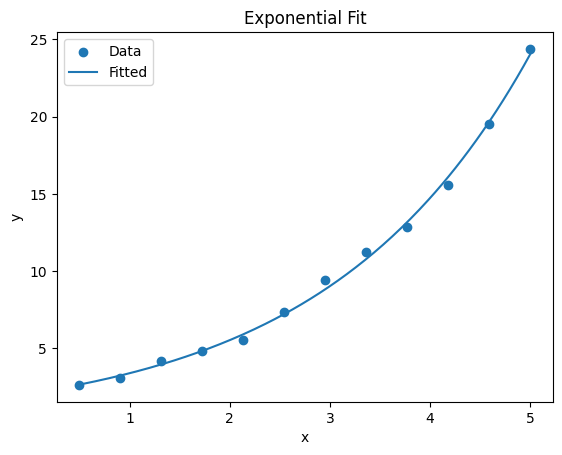

In [3]:
rng = np.random.default_rng(0)
x_exp = np.linspace(0.5, 5, 12)
true_a, true_b = 2.0, 0.5
y_exp = true_a * np.exp(true_b * x_exp) + rng.normal(0, 0.5, size=x_exp.size)

def exp_func(x, a, b): return a * np.exp(b * x)

popt, pcov = curve_fit(exp_func, x_exp, y_exp, p0=(1.0, 0.1), maxfev=10000)
a_fit, b_fit = popt
y_pred = exp_func(x_exp, *popt)
print(f"Fitted: y = {a_fit:.3f} * exp({b_fit:.3f} * x)")
print("R^2:", round(r2_score(y_exp, y_pred), 4))
x_fit = np.linspace(x_exp.min(), x_exp.max(), 200)
plt.figure(); plt.scatter(x_exp, y_exp, label="Data"); plt.plot(x_fit, exp_func(x_fit, *popt), label="Fitted")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Exponential Fit"); plt.legend(); plt.show()

## 3) Polynomial Fitting — NumPy (`polyfit` + `poly1d`)

NumPy coeffs (high->low): [-0.41492896  2.05154276  0.50024659]
NumPy R^2: 0.9707


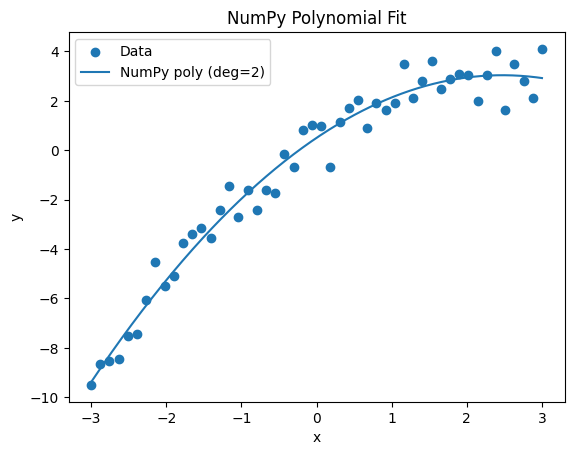

In [4]:
rng = np.random.default_rng(7)
x_poly = np.linspace(-3, 3, 50)
y_true = 1.0 + 2.0*x_poly - 0.5*x_poly**2
y_poly = y_true + rng.normal(0, 0.8, size=x_poly.size)

deg = 2  # try 1,2,3...
coeffs = np.polyfit(x_poly, y_poly, deg)
p = np.poly1d(coeffs)
y_hat = p(x_poly)
r2_np = r2_score_manual(y_poly, y_hat)
print("NumPy coeffs (high->low):", coeffs)
print("NumPy R^2:", round(r2_np, 4))
x_s = np.linspace(x_poly.min(), x_poly.max(), 400)
plt.figure(); plt.scatter(x_poly, y_poly, label="Data"); plt.plot(x_s, p(x_s), label=f"NumPy poly (deg={deg})")
plt.xlabel("x"); plt.ylabel("y"); plt.title("NumPy Polynomial Fit"); plt.legend(); plt.show()

## 4) Polynomial Fitting — SciPy (`curve_fit`)

SciPy params [a0,a1,a2]: [ 0.5002  2.0515 -0.4149]
SciPy R^2: 0.9707


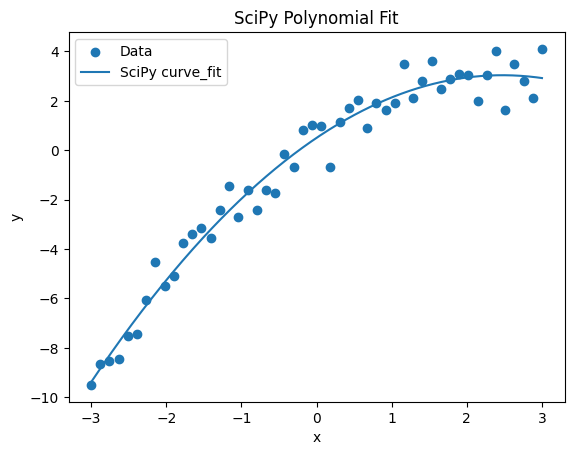

In [5]:
def quad(x, a0, a1, a2): return a0 + a1*x + a2*x**2
popt, pcov = curve_fit(quad, x_poly, y_poly, p0=(0.0, 0.0, 0.0), maxfev=10000)
y_hat_cf = quad(x_poly, *popt)
print("SciPy params [a0,a1,a2]:", np.round(popt, 4))
print("SciPy R^2:", round(r2_score(y_poly, y_hat_cf), 4))
x_s = np.linspace(x_poly.min(), x_poly.max(), 400)
plt.figure(); plt.scatter(x_poly, y_poly, label="Data"); plt.plot(x_s, quad(x_s, *popt), label="SciPy curve_fit")
plt.xlabel("x"); plt.ylabel("y"); plt.title("SciPy Polynomial Fit"); plt.legend(); plt.show()

## 5) Polynomial Fitting — scikit-learn (`PolynomialFeatures` + `LinearRegression`)

sklearn intercept: 0.5002
sklearn coeffs: [ 0.      2.0515 -0.4149]
sklearn R^2: 0.9707


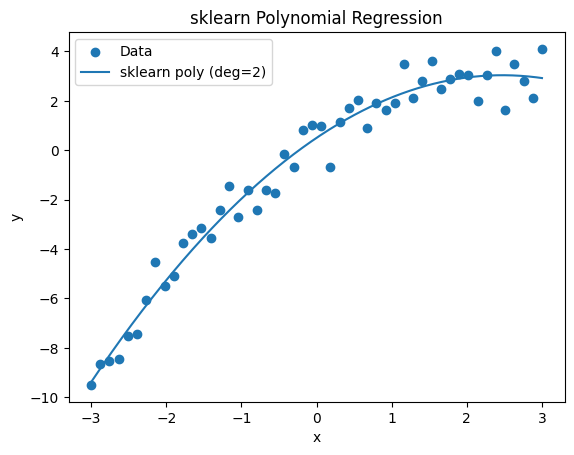

In [6]:
X = x_poly.reshape(-1, 1)
deg_skl = 2
poly = PolynomialFeatures(degree=deg_skl, include_bias=True)
X_poly = poly.fit_transform(X)
lr = LinearRegression().fit(X_poly, y_poly)
y_hat_skl = lr.predict(X_poly)
print("sklearn intercept:", round(lr.intercept_, 4))
print("sklearn coeffs:", np.round(lr.coef_, 4))
print("sklearn R^2:", round(r2_score(y_poly, y_hat_skl), 4))

x_s = np.linspace(x_poly.min(), x_poly.max(), 400).reshape(-1,1)
y_s = lr.predict(poly.transform(x_s))
plt.figure(); plt.scatter(X, y_poly, label="Data"); plt.plot(x_s, y_s, label=f"sklearn poly (deg={deg_skl})")
plt.xlabel("x"); plt.ylabel("y"); plt.title("sklearn Polynomial Regression"); plt.legend(); plt.show()

##6)Variable Polynomial Fitting (Degree 2)
Fit a polynomial surface with two predictors (e.g., Size and Distance) to predict a target (e.g., Price).
Steps:

Generate or upload data
Fit degree‑2 polynomial using scikit‑learn
Evaluate with train/test R²
Plot 3D scatter and fitted surface

1) Data: Use synthetic or upload CSV
Synthetic data mimics: Price = f(Size, Distance) with noise.
To upload CSV in Colab (columns: size, distance, price), run the upload cell and set use_uploaded=True.

In [7]:
# Synthetic data
rng = np.random.default_rng(7)
n = 300
size = rng.uniform(30, 200, n)   # x1
dist = rng.uniform(0, 25, n)     # x2
price_true = 50000 + 2000*size - 5000*dist + 3*size*dist - 5*(dist**2)
price = price_true + rng.normal(0, 20000, n)

X_synth = np.column_stack([size, dist])
y_synth = price

 2) Fit degree‑2 polynomial
We expand features to \([1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]\) and fit a linear model.


In [8]:
# Import in other necessary libraries for plotting
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("Libraries ready.")

Libraries ready.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_synth, y_synth, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=True)
Xtr = poly.fit_transform(X_train)
Xte = poly.transform(X_test)

model = LinearRegression().fit(Xtr, y_train)

y_pred_tr = model.predict(Xtr)
y_pred_te = model.predict(Xte)

print("R^2 train:", round(r2_score(y_train, y_pred_tr), 3))
print("R^2 test :", round(r2_score(y_test, y_pred_te), 3))

names = poly.get_feature_names_out(['size','dist'])
print("Features:", names)
print("Intercept:", model.intercept_)
print("Coefs (excluding bias):", model.coef_[1:])

R^2 train: 0.967
R^2 test : 0.968
Features: ['1' 'size' 'dist' 'size^2' 'size dist' 'dist^2']
Intercept: 47222.17066591358
Coefs (excluding bias): [ 2.00492645e+03 -4.71017643e+03  4.03819593e-02  4.34423612e-01
 -2.52336257e+00]


3) Visualize 3D scatter + fitted surface
One plot for clarity; Matplotlib default colors are used.


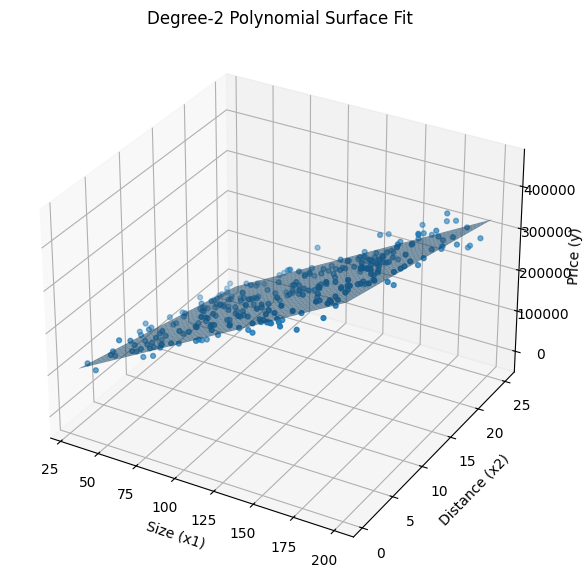

In [13]:
# Build grid for surface
s_min, s_max = X_synth[:,0].min(), X_synth[:,0].max()
d_min, d_max = X_synth[:,1].min(), X_synth[:,1].max()
S, D = np.meshgrid(np.linspace(s_min, s_max, 40),
                   np.linspace(d_min, d_max, 40))
Xg = np.column_stack([S.ravel(), D.ravel()])
Z = model.predict(poly.transform(Xg)).reshape(S.shape)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
# Scatter
idx = np.random.choice(len(X_synth), size=min(1000, len(X_synth)), replace=False)
ax.scatter(X_synth[idx,0], X_synth[idx,1], y_synth[idx], s=12, marker='o')
# Surface
ax.plot_surface(S, D, Z, alpha=0.6)
ax.set_xlabel('Size (x1)')
ax.set_ylabel('Distance (x2)')
ax.set_zlabel('Price (y)')
ax.set_title('Degree‑2 Polynomial Surface Fit')
plt.show()

## ✍️Try out
1. Change polynomial degree and compare **R²** across all three methods.
2. Increase noise and observe robustness.
3. Add a **train/test split** and report **test R²** for NumPy and scikit-learn fits.



# Exercise 1
Download the 'india_population.csv" dataset.Determine a fit to the population in the `india_population.csv` file. You should start by plotting the population.

What type of fit have you selected?

1) Linear Regression Fit for India Population

In [25]:
# Step 1: Load dataset
data = pd.read_csv("india_population.csv")

In [27]:
# Step 2: Extract columns
x = data['date'].values.astype(float)
y = data['Population'].values.astype(float)

In [28]:
# Step 3: Perform Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [29]:
# Step 4: Predict values
y_pred = slope * x + intercept

In [30]:
# Step 5: Print model details
print(f"Line: y = {slope:.3f} x + {intercept:.3f}")
print(f"R^2: {r_value**2:.4f}")

Line: y = 15298302.537 x + -29547277484.446
R^2: 0.9866


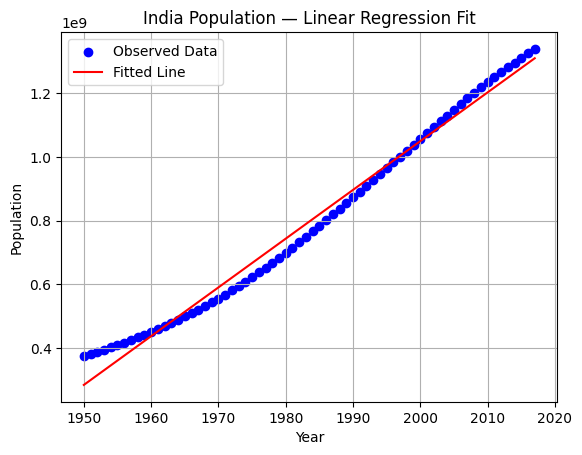

In [31]:
# Step 6: Plot observed data and fitted line
plt.figure()
plt.scatter(x, y, label="Observed Data", color="blue")
plt.plot(x, y_pred, label="Fitted Line", color="red")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("India Population — Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Step 7: Display residuals
residuals = y - y_pred
print("Residuals:", residuals)

Residuals: [ 91912736.90792847  82666182.37073135  73790004.83353043
  65236998.29633331  56972922.75913239  48976619.22193527
  41240532.68473434  33770114.14753723  26582094.6103363
  19701392.07313919  13152190.53594208   6948373.99874115
   1085096.46154404  -4464788.07565689  -9740563.612854
 -14763677.15005493 -19553803.68725204 -24083030.22445297
 -28268084.76165009 -31995875.29885101 -35188721.83604813
 -37808798.37324905 -39887862.91044617 -41503287.44764709
 -42769123.98484421 -43767129.52204514 -44538242.05924225
 -45057855.59644318 -45265128.13364029 -45067882.6708374
 -44408695.20803833 -43274848.74523544 -41718640.28243637
 -39827488.81963348 -37721339.35683441 -35493043.89403152
 -33176110.43123245 -30767554.96842957 -28279029.50563049
 -25711584.04282761 -23066766.58002853 -20369658.11722565
 -17634153.65442657 -14835612.19162369 -11935943.72882462
  -8913489.26602173  -5769136.80321884  -2532652.34041977
    752596.12238312   4028868.58518219   7247959.04798508
  10374

2. Exponential Fit for India Population

In [33]:
# Step 1: Load dataset
data = pd.read_csv("india_population.csv")

In [35]:
# Step 2: Extract columns
x = data['date'].values.astype(float)
y = data['Population'].values.astype(float)

In [36]:
# Step 3: Define Exponential Model
def exp_func(x, a, b):
    return a * np.exp(b * (x - x.min()))  # shift years to reduce overflow

In [37]:
# Step 4: Fit the Model
popt, pcov = curve_fit(exp_func, x, y, p0=(1.0, 0.01), maxfev=10000)
a_fit, b_fit = popt

In [38]:
# Step 5: Predict fitted values
y_pred = exp_func(x, *popt)

In [39]:
# Step 6: Compute R²
r2 = r2_score(y, y_pred)

In [40]:
# Step 7: Print model parameters and fit quality
print(f"Fitted Model: y = {a_fit:.3e} * exp({b_fit:.6f} * (x - {x.min():.0f}))")
print(f"R² = {r2:.4f}")

Fitted Model: y = 3.902e+08 * exp(0.019259 * (x - 1950))
R² = 0.9923


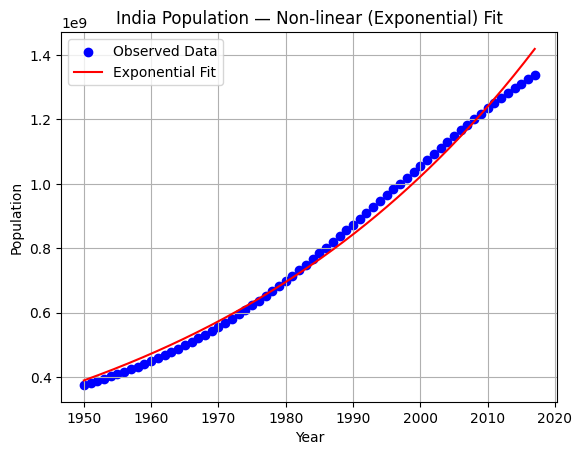

In [41]:
# Step 8: Plot observed data and fitted curve
x_fit = np.linspace(x.min(), x.max(), 300)
plt.figure()
plt.scatter(x, y, color='blue', label='Observed Data')
plt.plot(x_fit, exp_func(x_fit, *popt), color='red', label='Exponential Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('India Population — Non-linear (Exponential) Fit')
plt.legend()
plt.grid(True)
plt.show()

3. Polynomial Fitting — NumPy (polyfit + poly1d)

In [42]:
# Step 1: Load dataset
data = pd.read_csv("india_population.csv")

In [43]:
# Step 2: Extract data columns
x = data['date'].values.astype(float)
y = data['Population'].values.astype(float)

In [44]:
# Step 3: Choose polynomial degree
deg = 2   # You can try 1 (linear), 2 (quadratic), 3, etc.

In [45]:
# Step 4: Fit polynomial
coeffs = np.polyfit(x, y, deg)
p = np.poly1d(coeffs)
y_hat = p(x)

In [46]:
# Step 5: Compute R² value
r2_np = r2_score_manual(y, y_hat)

In [47]:
# Step 6: Print results
print("NumPy coefficients (high → low):", coeffs)
print(f"Polynomial Degree: {deg}")
print("NumPy R²:", round(r2_np, 4))

NumPy coefficients (high → low): [ 9.32963199e+04 -3.54808198e+08  3.37469902e+11]
Polynomial Degree: 2
NumPy R²: 0.9979


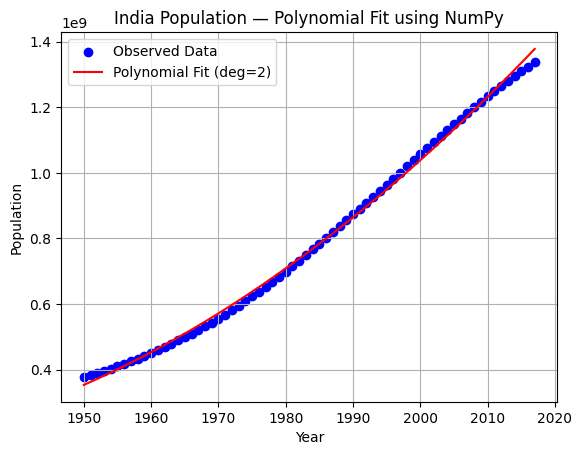

In [48]:
# Step 7: Plot data and fitted polynomial curve
x_s = np.linspace(x.min(), x.max(), 400)
plt.figure()
plt.scatter(x, y, label="Observed Data", color='blue')
plt.plot(x_s, p(x_s), label=f"Polynomial Fit (deg={deg})", color='red')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("India Population — Polynomial Fit using NumPy")
plt.legend()
plt.grid(True)
plt.show()

4. Polynomial Fitting — SciPy (curve_fit)

In [49]:
# Step 1: Load dataset
data = pd.read_csv("india_population.csv")

In [50]:
# Step 2: Extract data columns
x = data['date'].values.astype(float)
y = data['Population'].values.astype(float)

In [51]:
# Step 3: Define polynomial function (quadratic example)
def quad(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

In [52]:
# Step 4: Fit polynomial using curve_fit
popt, pcov = curve_fit(quad, x, y, p0=(0.0, 0.0, 0.0), maxfev=10000)

In [53]:
# Step 5: Predict fitted values
y_hat_cf = quad(x, *popt)

In [54]:
# Step 6: Compute R²
r2 = r2_score(y, y_hat_cf)

In [55]:
# Step 7: Print parameters and fit quality
print("SciPy params [a0, a1, a2]:", np.round(popt, 4))
print(f"SciPy R² = {r2:.4f}")

SciPy params [a0, a1, a2]: [ 3.37471607e+11 -3.54809918e+08  9.32967533e+04]
SciPy R² = 0.9979


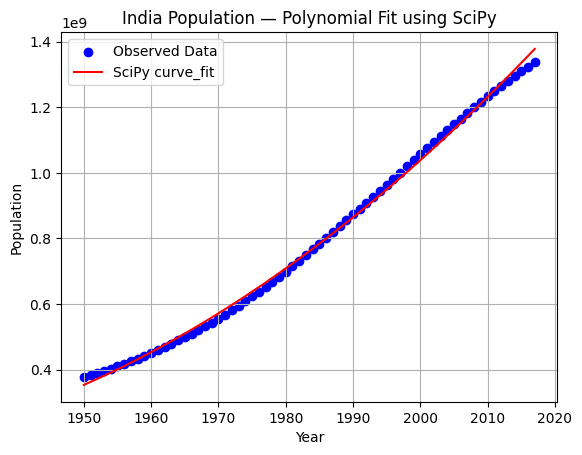

In [56]:
# Step 8: Plot data and fitted curve
x_s = np.linspace(x.min(), x.max(), 400)
plt.figure()
plt.scatter(x, y, label="Observed Data", color='blue')
plt.plot(x_s, quad(x_s, *popt), label="SciPy curve_fit", color='red')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("India Population — Polynomial Fit using SciPy")
plt.legend()
plt.grid(True)
plt.show()

5. Polynomial Fitting — scikit-learn (PolynomialFeatures + LinearRegression)


In [57]:
# Step 1: Load dataset
data = pd.read_csv("india_population.csv")

In [58]:
# Step 2: Extract columns
x = data['date'].values.astype(float)
y = data['Population'].values.astype(float)

In [59]:
# Step 3: Reshape X for sklearn
X = x.reshape(-1, 1)

In [60]:
# Step 4: Choose polynomial degree
deg_skl = 2   # Try 1,2,3...

In [61]:
# Step 5: Create polynomial features
poly = PolynomialFeatures(degree=deg_skl, include_bias=True)
X_poly = poly.fit_transform(X)

In [62]:
# Step 6: Fit Linear Regression on polynomial features
lr = LinearRegression().fit(X_poly, y)
y_hat_skl = lr.predict(X_poly)

In [63]:
# Step 7: Print model parameters and R²
print("sklearn intercept:", round(lr.intercept_, 4))
print("sklearn coefficients:", np.round(lr.coef_, 4))
print("sklearn R²:", round(r2_score(y, y_hat_skl), 4))

sklearn intercept: 337469902389.7634
sklearn coefficients: [ 0.00000000e+00 -3.54808198e+08  9.32963199e+04]
sklearn R²: 0.9979


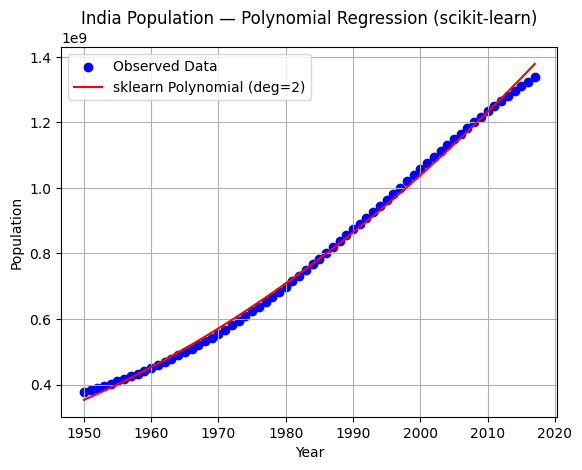

In [64]:
# Step 8: Plot observed data and polynomial regression curve
x_s = np.linspace(x.min(), x.max(), 400).reshape(-1,1)
y_s = lr.predict(poly.transform(x_s))

plt.figure()
plt.scatter(X, y, label="Observed Data", color='blue')
plt.plot(x_s, y_s, label=f"sklearn Polynomial (deg={deg_skl})", color='red')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("India Population — Polynomial Regression (scikit-learn)")
plt.legend()
plt.grid(True)
plt.show()

6. Variable Polynomial Fitting (Degree 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("Libraries ready.")

Libraries ready.


In [2]:
# ------------------------------------------------------------
# 2. Generate Synthetic Data
# ------------------------------------------------------------
rng = np.random.default_rng(7)
n = 300
size = rng.uniform(30, 200, n)     # Feature 1 (x1)
dist = rng.uniform(0, 25, n)       # Feature 2 (x2)

# True relationship (Quadratic with noise)
price_true = 50000 + 2000*size - 5000*dist + 3*size*dist - 5*(dist**2)
price = price_true + rng.normal(0, 20000, n)

# Combine features
X_synth = np.column_stack([size, dist])
y_synth = price

In [3]:
# ------------------------------------------------------------
# 3. Train-Test Split and Degree-2 Polynomial Expansion
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_synth, y_synth, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=True)
Xtr = poly.fit_transform(X_train)
Xte = poly.transform(X_test)

In [4]:
# ------------------------------------------------------------
# 4. Fit Polynomial Regression Model
# ------------------------------------------------------------
model = LinearRegression().fit(Xtr, y_train)
y_pred_tr = model.predict(Xtr)
y_pred_te = model.predict(Xte)

In [5]:
# ------------------------------------------------------------
# 5. Print Model Summary
# ------------------------------------------------------------
print("R² train:", round(r2_score(y_train, y_pred_tr), 3))
print("R² test :", round(r2_score(y_test, y_pred_te), 3))

names = poly.get_feature_names_out(['size', 'dist'])
print("\nFeatures:", names)
print("Intercept:", round(model.intercept_, 2))
print("Coefs (excluding bias):", np.round(model.coef_[1:], 2))

R² train: 0.967
R² test : 0.968

Features: ['1' 'size' 'dist' 'size^2' 'size dist' 'dist^2']
Intercept: 47222.17
Coefs (excluding bias): [ 2.00493e+03 -4.71018e+03  4.00000e-02  4.30000e-01 -2.52000e+00]


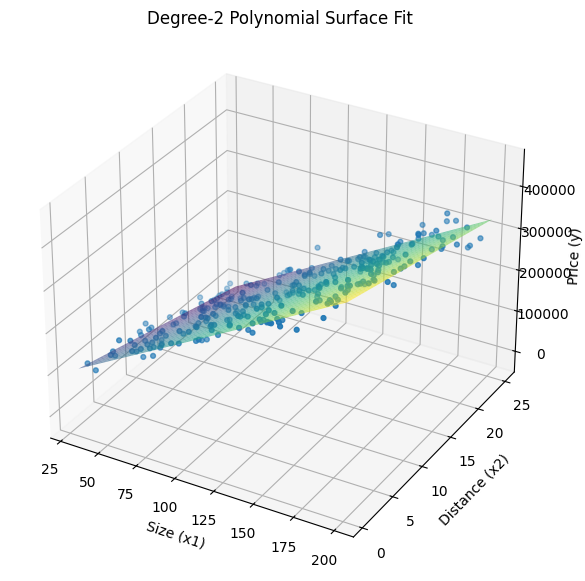

In [6]:
# ------------------------------------------------------------
# 6. Visualize: 3D Scatter + Fitted Polynomial Surface
# ------------------------------------------------------------
# Create grid for surface prediction
s_min, s_max = X_synth[:, 0].min(), X_synth[:, 0].max()
d_min, d_max = X_synth[:, 1].min(), X_synth[:, 1].max()
S, D = np.meshgrid(np.linspace(s_min, s_max, 40),
                   np.linspace(d_min, d_max, 40))

# Predict over the grid
Xg = np.column_stack([S.ravel(), D.ravel()])
Z = model.predict(poly.transform(Xg)).reshape(S.shape)

# Plot the surface and sample data
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
idx = np.random.choice(len(X_synth), size=min(1000, len(X_synth)), replace=False)
ax.scatter(X_synth[idx, 0], X_synth[idx, 1], y_synth[idx], s=12, marker='o')

# Surface plot
ax.plot_surface(S, D, Z, alpha=0.6, cmap='viridis')

ax.set_xlabel('Size (x1)')
ax.set_ylabel('Distance (x2)')
ax.set_zlabel('Price (y)')
ax.set_title('Degree-2 Polynomial Surface Fit')

plt.show()